In [1]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

C:\Users\austinsh\AppData\Local\Temp\ipykernel_59192\3402816738.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importing CSV files


# df_adjust_Limits = pd.read_csv('https://raw.githubusercontent.com/saust1/Project-OptiC4/main/1%20Preprocess/Continuous%20Data/contData_all.csv')

# df_adjustments = pd.read_csv('https://raw.githubusercontent.com/saust1/Project-OptiC4/main/CSV/PVs/adjust_limits.csv')


df_adjust_Limits = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\contData_all.csv")

df_adjustments = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\II Data\1 Collection\CSV\PVs\adjust_limits.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\austinsh\\Project-OptiC4\\III Models\\3 Model C4\\5 Preprocessing - Slecected Features\\Continuous Data\\contData_all.csvv'

In [ ]:
num_columns = df_adjust_Limits.shape[1]
print("Number of features:", num_columns)

Number of features: 57


In [ ]:
# # Convert 'Date' column to datetime in df_adjust_Limits and df_LD using the appropriate format
# df_adjust_Limits['Date'] = pd.to_datetime(df_adjust_Limits['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Check for NaT entries in both dataframes
# nat_count_CD = df_adjust_Limits['Date'].isna().sum()

df_adjust_Limits.describe()

,425_pct_Al,Al2O3,M_Value,C4_pct_Eth,C4_pct_H2O,C4_pct_Hex,Butanol,Decanol,Ethanol,Hexanol,Octanol,HydWtr_pct_Ammonia,HydWtr_Na2O,AYC55580,DI55102,DI55152,DI55580,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,II52554,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,VI52558B
count,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.000000,92515.00000
mean,2.167372,11.164665,3.635270,1.546376,20.763690,0.520813,175.976613,8.839064,44.256218,10.131772,8.053266,0.969700,0.886332,9.322818,0.932599,0.940888,0.989925,31257.927051,27133.459745,4485.756494,636.892732,32395.360211,29717.111921,26376.126026,23619.066822,5108.840561,300.453412,9.041062,1.904441,26365.631101,142.028456,57.595856,49.407534,45.078131,54.084237,32.147146,46.265897,39.562703,1.720884,-1.115203,0.777402,74.670675,139.140882,147.400400,148.801893,159.522097,202.613929,140.622861,186.066143,185.407991,180.643814,180.063460,174.161652,209.400215,204.559295,2.48933
std,160.910163,0.713781,0.635173,3.801701,4.418826,0.814013,818.770159,62.963233,130.072065,130.206783,51.785114,0.216377,3.246453,7.940660,0.071202,0.056787,0.057591,10731.851624,12980.910492,2700.834946,639.918706,19793.176315,18131.645290,16016.398449,9895.771092,2718.001688,292.332794,62.659133,28.398176,15642.577110,69.535926,16.642639,27.056037,25.742092,29.054435,17.585026,26.711112,21.585277,1.759943,1.249860,1.291497,16.852005,61.050970,69.847433,64.667025,75.443329,324.800371,98.572914,42.543024,35.392487,39.249056,31.293196,38.919992,46.963357,48.795542,1.49276
min,-9986.000000,8.710000,0.000000,0.001000,0.057000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070270,-0.256120,-63.099400,0.000000,0.000000,0.000000,-428.202000,-45.776400,-24.455300,-19.480800,-8745.360000,-7000.000000,-12997.800000,-106.878000,0.000000,-9.608200,0.000000,0.000000,-29.830200,-192.500000,-5.000000,-0.628034,-0.631604,-0.627794,-0.750000,0.000000,0.000000,-9.935260,-9.653360,-4.811260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-44.760100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.03809
25%,5.971735,10.702400,3.514165,0.658170,18.111400,0.321846,4.250005,1.625000,6.673330,1.995720,2.373355,0.861000,0.394923,7.324570,0.891766,0.914672,0.962844,26954.200000,23510.950000,2354.920000,3.097505,14532.900000,16539.800000,10731.500000,22610.050000,5491.840000,0.000000,0.949928,0.710230,15675.550000,130.793000,60.482650,47.514750,40.971600,63.735500,33.171750,25.161300,21.382350,0.337695,-2.078545,0.000000,63.877850,140.125000,134.792000,179.290000,172.027000,67.019900,117.097500,180.752500,181.443500,179.022000,180.248000,175.510000,216.751500,214.932000,1.80327
50%,6.117350,11.383100,3.605200,1.218240,20.330900,0.413898,8.255310,2.888640,16.883400,3.430000,4.003330,0.933990,0.618563,10.435500,0.944321,0.940675,0.992938,35536.800000,30591.600000,5560.750000,553.572000,41870.700000,39066.700000,35490.000000,28118.300000,6435.890000,279.777000,0.989743,0.761608,34971.600000,157.622000,63.012100,64.403500,51.012800,69.039600,40.870800,48.916400,45.382600,1.509160,-0.803031,0.422058,75.937500,164.063000,166.623000,180.033000,194.882000,79.732

In [ ]:
# Annotate all range adjustements with rationale

#df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Data\CSV to PRocess\RangeD.csv")
df_adjustments

,Range,425_pct_Al,Butanol,Decanol,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FI55580,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,TI55565,TI90366,TI90368,AYC55580,DI52018,DI55102,DI55152,DI55580,TI52014,VI52558B
0,Min,0,0,0,0,5000,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-10.0,-10.0,-4.7,0,100,100,100,0,0,0,0,0,0,0,0,0,150,0,0,0.5,0.8,0.75,0,0,0
1,Max,10,100,10,50000,50000,40000,3000,70000,70000,52000,70000,12800,1500,10,1,70000,60000,100,100,100,100,100,100,100,20.3,20.3,10.3,250.0,300,275,300,300,125,300,300,300,300,300,350,350,300,200,200,20,0.5,1.2,1.30,100,200,11


In [ ]:
#Finds and removes system limit (Min/Max) values

# Assuming df_adjustments and df_adjust_Limits are your dataframes

# Extract the min and max rows from df_adjustments into separate Series
min_values = df_adjustments[df_adjustments['Range'] == 'Min'].iloc[0, 1:]
max_values = df_adjustments[df_adjustments['Range'] == 'Max'].iloc[0, 1:]

# Iterate through each column in df_adjust_Limits
for col in df_adjust_Limits.columns:
    # Check if the column exists in df_adjustments
    if col in min_values.index:
        # Get the min and max values for this column from df_adjustments
        min_val = min_values[col]
        max_val = max_values[col]
        
        # Filter out values in df_adjust_Limits that are less than min or greater than max
        df_adjust_Limits.loc[df_adjust_Limits[col] < min_val, col] = None
        df_adjust_Limits.loc[df_adjust_Limits[col] > max_val, col] = None


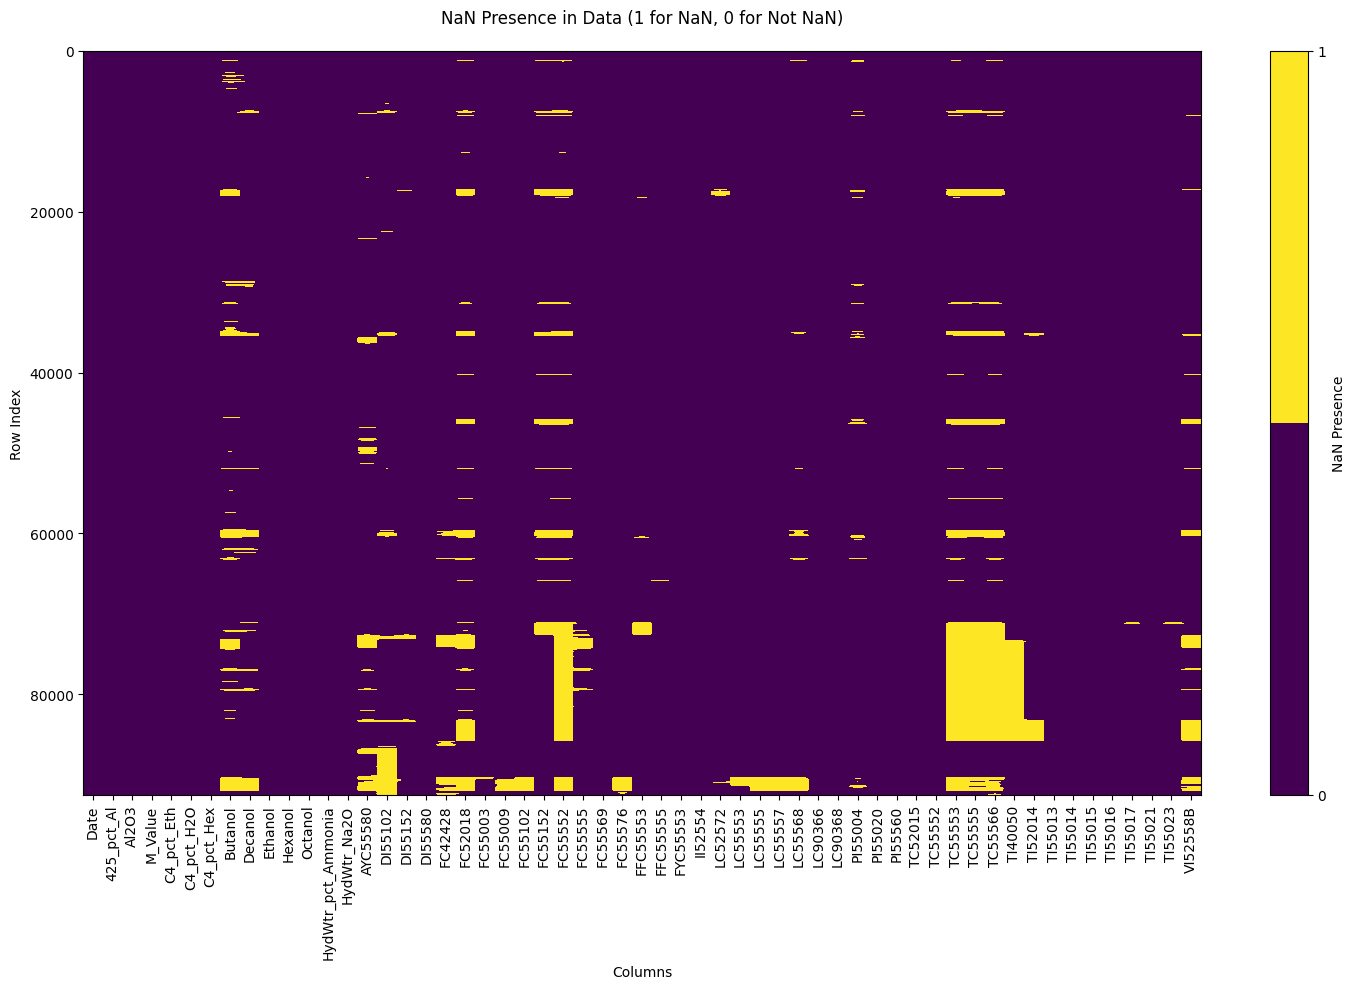

In [ ]:
# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_adjust_Limits.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_adjust_Limits.shape[1]), df_adjust_Limits.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the statistics for each column in df_adjust_Limits
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       92515          92515          0        0.000000
1           425_pct_Al       92515          92445         70        0.075663
2                Al2O3       92515          92515          0        0.000000
3              M_Value       92515          92515          0        0.000000
4           C4_pct_Eth       92515          92515          0        0.000000
5           C4_pct_H2O       92515          92515          0        0.000000
6           C4_pct_Hex       92515          92515          0        0.000000
7              Butanol       92515          77300      15215       16.445982
8              Decanol       92515          84377       8138        8.796411
9              Ethanol       92515          92515          0        0.000000
10             Hexanol       92515          92515          0        0.000000
11             Octanol       92515          92515          0        0.000000

In [ ]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_adjust_Limits = df_adjust_Limits.dropna()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       53875          53875          0             0.0
1           425_pct_Al       53875          53875          0             0.0
2                Al2O3       53875          53875          0             0.0
3              M_Value       53875          53875          0             0.0
4           C4_pct_Eth       53875          53875          0             0.0
5           C4_pct_H2O       53875          53875          0             0.0
6           C4_pct_Hex       53875          53875          0             0.0
7              Butanol       53875          53875          0             0.0
8              Decanol       53875          53875          0             0.0
9              Ethanol       53875          53875          0             0.0
10             Hexanol       53875          53875          0             0.0
11             Octanol       53875          53875          0             0.0

In [ ]:
# 59840 Records with all features included for preprocessing

df_adjust_Limits = df_adjust_Limits.sort_values('Date')
df_adjust_Limits = df_adjust_Limits.reset_index(drop=True)


# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
# df_adjust_Limits.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\adjusted_Limits.csv', index=False)

#bordeCode
df_adjust_Limits.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\adjusted_Limits.csv', index=False)

In [ ]:
df_adjust_Limits.describe()



,425_pct_Al,Al2O3,M_Value,C4_pct_Eth,C4_pct_H2O,C4_pct_Hex,Butanol,Decanol,Ethanol,Hexanol,Octanol,HydWtr_pct_Ammonia,HydWtr_Na2O,AYC55580,DI55102,DI55152,DI55580,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,II52554,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,VI52558B
count,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,5.387500e+04,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.00000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000,53875.000000
mean,6.154642,11.341853,3.638371,1.430136,21.425471,0.546504,11.572436,3.090717,21.356854,3.610739,4.175499,0.988671,0.943788,11.111441,0.941279,0.931622,0.995293,35905.083377,32468.804102,5.979218e+03,837.366891,43599.010856,39500.124728,35521.052479,27416.318801,6621.955100,374.943133,0.994176,0.771652,35257.273013,169.781226,63.053125,63.095650,56.702873,69.519292,40.84395,46.354871,35.996731,2.301941,-1.402511,1.117078,74.742976,168.185659,180.352383,181.039432,197.655854,73.143098,128.968733,200.303484,196.527594,194.012094,189.730256,185.285758,224.055387,218.471638,2.927218
std,0.295811,0.611254,0.800889,2.971213,4.606652,0.847025,15.122049,1.625842,25.314255,2.363976,2.173127,0.209083,4.183584,3.985782,0.053490,0.031282,0.047404,5553.297485,6639.937492,1.036088e+03,611.027076,7519.053878,6801.032638,5518.052889,4378.202263,501.273654,258.139854,0.061119,0.025383,5611.331162,30.693196,3.132588,7.232873,9.932935,3.120708,2.94058,28.705559,20.513337,1.315719,1.156290,1.127025,16.500670,16.221308,28.695039,1.832894,13.658559,15.100986,11.134065,18.066264,14.053042,14.016739,9.344065,10.009132,11.650607,3.891385,1.195475
min,0.352412,8.710000,0.571967,0.001000,0.057000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070270,0.000000,0.000000,0.800002,0.810176,0.793765,67.545500,5032.970000,1.930000e-17,0.000000,0.000000,457.346000,9878.640000,0.000000,0.000000,0.000000,0.042564,0.000000,1102.580000,-0.962500,0.000000,0.000000,0.000000,0.000000,2.25000,0.000000,0.006367,0.001366,-5.655290,-4.807810,0.000000,109.571000,104.460000,100.587000,135.390000,21.390100,83.938800,71.656700,103.609000,68.965800,115.915000,68.321400,73.404200,168.248000,0.138564
25%,6.008585,11.031700,3.506585,0.636643,18.843000,0.338056,3.795105,1.860000,5.285735,2.049525,2.450000,0.875771,0.456073,9.852185,0.906706,0.911950,0.966441,34383.050000,28431.550000,5.433730e+03,303.882000,40725.000000,37375.900000,33996.850000,26144.850000,6332.060000,197.528000,0.971596,0.757888,33613.550000,147.555000,61.656300,58.787250,46.964850,66.907300,40.63975,22.170000,18.498450,1.290030,-2.296605,0.245717,64.021450,154.875000,160.072000,179.961000,185.971500,62.739250,121.164500,185.451000,185.099500,182.810000,182.201500,177.708000,217.497000,215.538000,2.135395
50%,6.146730,11.476500,3.591070,1.180560,21.437800,0.439769,5.945770,2.914500,12.633300,3.305550,4.016600,0.943906,0.662374,10.771700,0.945555,0.931601,0.997287,37856.300000,32747.300000,5.987990e+03,815.732000,45594.400000,41215.100000,37935.600000,28969.700000,6574.570000,348.190000,0.998092,0.771569,37342.700000,166.455000,63.500000,65.243000,59.944500,70.115000,41.21880,47.316800,40.720200,1.991500,-1.360650,0.844398,75.623300,172.625000,175.331000,180.122000,200.252000,76.314800,129.407000,198.535000,195.2

In [ ]:
# 59840 Records with all features included for preprocessing

In [ ]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-03-09 21:37:58.535502
